## 14.1 비동기 작업의 이해
- 웹 애플리케이션에서 서버 쪽 데이터가 필요할 때는 Ajax 기법을 사용하여 서버의 API를 호출함으로써 데이터를 수신
- 서버의 API를 사용해야 할 때는 네트워크 송수신 과정에서 시간이 걸리기 때문에 작업이 즉시 처리되는 것이 아니라, 응답을 받을 때까지 기다렸다가 전달받은 응답 데이터를 처리, 이 과정에서 해당 작업을 비동기적으로 처리
- 웹 애플리케이션이 멈추지 않기 때문에 동시에 여러 가지 요청을 처리할 수도 있고, 기다리는 과정에서 다른 함수도 호출할 수 있다.
-  콜백 함수
    - 다른 코드에 의해 나중에 호출되는 함수
    - 특정 이벤트가 발생하거나 특정 시점에 실행되도록 설계된 함수
- Promise
    - 콜백 지옥 같은 코드가 형성되지 않게 하는 방안으로 ES6에 도입된 기능
    - .then을 사용하여 다음 작업을 설정하기 때문에 콜백 지옥이 형성되지 않는다
- async/await
    - promise를 더욱 쉽게 사용할 수 있도록 해주는 ES2017(ES8)문법
    - Promise가 끝날 때까지 기다리고, 결과 값을 특정 변수에 담을 수 있다

## 14.2 axios로 API 호출해서 데이터 받아오기
- axios는 현재 가장 많이 사용되고 있는 자바스크립트 HTTP 클라이언트
- HTTP 요청을 Promise 기반으로 처리한다
- yarn add axios
- 가짜 API를 호출하고 이에 대한 응답을 컴포넌트 상태에 넣어서 보여준다.
    ```js
    import React, {useState} from 'react';
    import axios from 'axios'

    const App = () => {
    const [data, setData] = useState(null)
    const onClick = async() => {
        try{
        const response = await axios.get(
            'https://jsonplaceholder.typicode.com/todos/1',
        )
        setData(response.data)
        } catch(e) {
        console.log(e)
        }
    }
    return(
        <div>
        <div>
            <button onClick={onClick}>불러오기</button>
        </div>
        {data && <textarea rows={7} value={JSON.stringify(data, null, 2)} readOnly={true} />}
        </div>
    )
    };

    export default App;
    ```
    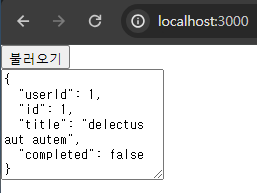

## 14.3 newsapi API키 발급
- newsapi에서 제공하는 API를 사용해 최신 뉴스를 불러온 후 보여줄 것
```js
import React, {useState} from 'react';
import axios from 'axios'

const App = () => {
  const [data, setData] = useState(null)
  const onClick = async() => {
    try{
      const response = await axios.get(
        'https://newsapi.org/v2/top-headlines?country=kr&apiKey=us&apiKey=',
      )
      setData(response.data)
    } catch(e) {
      console.log(e)
    }
  }
  return(
    <div>
      <div>
        <button onClick={onClick}>불러오기</button>
      </div>
      {data && <textarea rows={7} value={JSON.stringify(data, null, 2)} readOnly={true} />}
    </div>
  )
};

export default App;
```

## 14.4 뉴스 뷰어 UI 만들기
- yarn ad styled-components
- NewsItem
    - 각 뉴스 데이터가 지니고 있는 정보
        - title: 제목, description : 내용, url : 링크, urlTolmage: 뉴스 이미지
    - article 객체를 props로 받아와서 사용
        ```js
        import React from 'react';
        import styled from 'styled-components';

        const NewsItemBlock = styled.div`
            display: flex;
            .thumbnail {
                margin-right: 1rem;
                img {
                display: block;
                width: 160px;
                height: 100px;
                object-fit: cover;
                }
            }
            .contents {
                h2 {
                    margin: 0;
                    a {
                        color: black;
                    }
                }
                p {
                    margin: 0;
                    line-height: 1.5;
                    margin-top: 0.5rem;
                    white-space: normal;
                }
            }
            & + & {
                margin-top: 3rem;
            }
            `;
        const NewsItem = ({ article }) => {
            const { title, description, url, urlToImage } = article;
            return (
                <NewsItemBlock>
                {urlToImage && (
                    <div className="thumbnail">
                        <a href={url} target="_blank" rel="noopener noreferrer">
                            <img src={urlToImage} alt="thumbnail" />
                        </a>
                    </div>
                )}
                <div className="contents">
                    <h2>
                        <a href={url} target="_blank" rel="noopener noreferrer">
                            {title}
                        </a>
                    </h2>
                    <p>{description}</p>
                </div>
                </NewsItemBlock>
            );
        };

        export default NewsItem;
        ```
- NewsList
    ```js
    import React from 'react';
    import styled from 'styled-components';
    import NewsItem from './NewsItem';

    const NewsListBlock = styled.div`
        box-sizing: border-box;
        padding-bottom: 3rem;
        width: 768px;
        margin: 0 auto;
        margin-top: 2rem;
        @media screen and (max-width: 768px) {
            width: 100%;
            padding-left: 1rem;
            padding-right: 1rem;
        }
    `;

    const sampleArticle = {
        title: '제목',
        discription:'내용',
        url:'https://google.com',
        urlToImage:'https://via.placeholder.com/160',
    }

    const NewsList = () => {
        return(
            <NewsListBlock>
                <NewsItem article={sampleArticle}/>
                <NewsItem article={sampleArticle}/>
                <NewsItem article={sampleArticle}/>
            </NewsListBlock>
        )
    };

    export default NewsList;
    ```
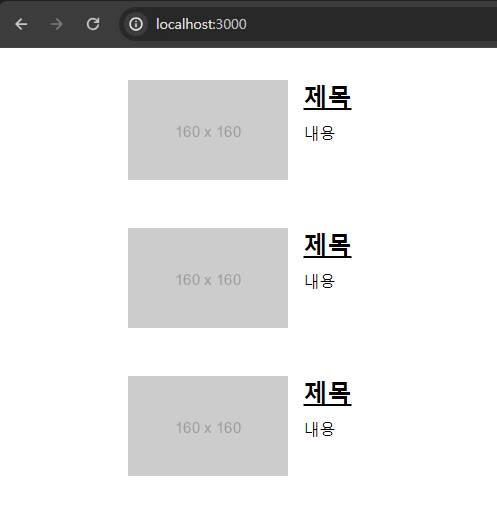


## 14.5 데이터 연동하기
- 컴포넌트가 화면에 보이는 시점에 API 요청
- useEffect 사용, useEffect에 등록하는 함수에 async 붙이면 안 된다.
- useEffect에서 반환해야 하는 값은 뒷정리 함수이기 때문
    ```js
    import {useState, useEffect} from 'react';
    import styled from 'styled-components';
    import NewsItem from './NewsItem';
    import axios from 'axios'

    const NewsListBlock = styled.div`
        box-sizing: border-box;
        padding-bottom: 3rem;
        width: 768px;
        margin: 0 auto;
        margin-top: 2rem;
        @media screen and (max-width: 768px) {
            width: 100%;
            padding-left: 1rem;
            padding-right: 1rem;
        }
    `;

    const NewsList = () => {
        const [articles, setArticles] = useState(null)
        const [loading, setLoading] = useState(false)

        useEffect(() => {
            // async를 사용하는 함수 따로 선언
            const fetchData = async () => {
                setLoading(true);
                try {
                    const response = await axios.get(
                        'https://newsapi.org/v2/top-headlines?country=kr&apiKey=',
                    )
                    setArticles(response.data.articles)
                } catch (e) {
                    console.log(e)
                }
                setLoading(false)
            }
            fetchData()
        }, [])

        // 대기 중일 때
        if (loading) {
            return <NewsListBlock>대기 중...</NewsListBlock>
        }
        // 아직 articles 값이 설정되지 않았을 때
        if (!articles){
            return null
        }

        // articles 값이 유요할 때
        return(
            <NewsListBlock>
                {articles.map(article =>(
                    <NewsItem key={article.url} article={article} />
                ))}
            </NewsListBlock>
        )
    };

    export default NewsList;
    ```
- 데이터를 불러와 뉴스 데이터 배열을 map 함수를 사용하여 컴포넌트 배열로 변환할 때 신경 써야한다.
- map 함수를 사용하기 전 꼭 !articles를 조회하여 해당 값이 현재 null이 아닌지 검사해야 한다.
    - 아직 데이터가 없을 때 null에는 map 함수가 없기 때문에 렌더링 과정에서 오류

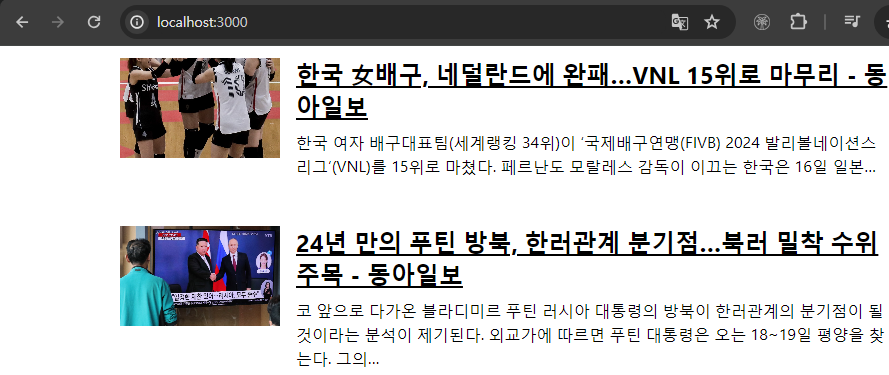

## 14.6 카테고리 기능 구현하기
- 카테고리 선택 UI 만들기
    ```js
    import styled from 'styled-components';

    const categories = [
        {
            name: 'all',
            text: '전체보기',
        },
        {
            name: 'business',
            text: '비즈니스',
        },
        {
            name: 'entertainment',
            text: '엔터테인먼트',
        },
        {
            name: 'health',
            text: '건강',
        },
        {
            name: 'science',
            text: '과학',
        },
        {
            name: 'sports',
            text: '스포츠',
        },
        {
            name: 'technology',
            text: '기술',
        },
    ];

    const CategoriesBlock = styled.div`
        display: flex;
        padding: 1rem;
        width: 768px;
        margin: 0 auto;
        @media screen and (max-width: 768px) {
            width: 100%;
            overflow-x: auto;
        }
    `;

    const Category = styled.div`
        font-size: 1.125rem;
        cursor: pointer;
        white-space: pre;
        text-decoration: none;
        color: inherit;
        padding-bottom: 0.25rem;

        &:hover {
            color: #495057;
        }

        & + & {
            margin-left: 1rem;
        }
    `;
    const Categories = () => {
        return (
            <CategoriesBlock>
                {categories.map(c => (
                    <Category key={c.name}>
                        {c.text}
                    </Category>
                ))}
            </CategoriesBlock>
        );
    };

    export default Categories;
    ```
    
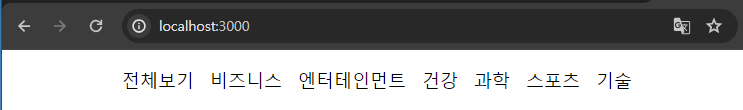

- 현재 선택된 카테고리 값에 따라 다른 스타일 적용
    ```js
    import styled, {css} from 'styled-components';

    const categories = [
        {
            name: 'all',
            text: '전체보기',
        },
        {
            name: 'business',
            text: '비즈니스',
        },
        {
            name: 'entertainment',
            text: '엔터테인먼트',
        },
        {
            name: 'health',
            text: '건강',
        },
        {
            name: 'science',
            text: '과학',
        },
        {
            name: 'sports',
            text: '스포츠',
        },
        {
            name: 'technology',
            text: '기술',
        },
    ];

    const CategoriesBlock = styled.div`
        display: flex;
        padding: 1rem;
        width: 768px;
        margin: 0 auto;
        @media screen and (max-width: 768px) {
            width: 100%;
            overflow-x: auto;
        }
    `;

    const Category = styled.div`
        font-size: 1.125rem;
        cursor: pointer;
        white-space: pre;
        text-decoration: none;
        color: inherit;
        padding-bottom: 0.25rem;

        &:hover {
            color: #495057;
        }
        
        ${props =>
            props.active && css`
                font-weight: 600;
                border-bottom: 2px solid #22b8cf;
                color: #22b8cf;
                &:hover {
                    color: #3bc9db;
                }
            `
        }

        & + & {
            margin-left: 1rem;
        }
    `;
    const Categories = ({onSelect, category}) => {
        return (
            <CategoriesBlock>
                {categories.map(c => (
                    <Category
                        key={c.name}
                        active={category === c.name}
                        onClick={() => onSelect(c.name)}
                    >
                        {c.text}
                    </Category>
                ))}
            </CategoriesBlock>
        );
    };

    export default Categories;
    ```

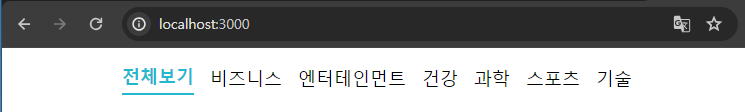

- API를 호출할 때 카테고리 지정
```js
import {useState, useEffect} from 'react';
import styled from 'styled-components';
import NewsItem from './NewsItem';
import axios from 'axios'

const NewsListBlock = styled.div`
    box-sizing: border-box;
    padding-bottom: 3rem;
    width: 768px;
    margin: 0 auto;
    margin-top: 2rem;
    @media screen and (max-width: 768px) {
        width: 100%;
        padding-left: 1rem;
        padding-right: 1rem;
    }
`;

const NewsList = ({category}) => {
    const [articles, setArticles] = useState(null)
    const [loading, setLoading] = useState(false)

    useEffect(() => {
        // async를 사용하는 함수 따로 선언
        const fetchData = async () => {
            setLoading(true);
            try {
                const query = category === 'all' ? '' : `&category=${category}`
                const response = await axios.get(
                    `https://newsapi.org/v2/top-headlines?country=kr${query}&apiKey=`,
                )
                setArticles(response.data.articles)
            } catch (e) {
                console.log(e)
            }
            setLoading(false)
        }
        fetchData()
    }, [category])

    // 대기 중일 때
    if (loading) {
        return <NewsListBlock>대기 중...</NewsListBlock>
    }
    // 아직 articles 값이 설정되지 않았을 때
    if (!articles){
        return null
    }

    // articles 값이 유요할 때
    return(
        <NewsListBlock>
            {articles.map(article =>(
                <NewsItem key={article.url} article={article} />
            ))}
        </NewsListBlock>
    )
};

export default NewsList;
```

## 14.7 리액트 라우터 적용하기
- yarn add react-router-dom
- newspage 만들기
    ```js
    import {useParams} from 'react-router-dom'
    import Categories from '../components/Categories';
    import NewsList from '../components/NewsList';

    const NewsPage = () => {
        const params = useParams()

        // 카테고리가 선택되지 않으면 기본값 all
        const category = params.category || 'all'

        return (
            <>
                <Categories/>
                <NewsList category={category} />
            </>
        );
    };

    export default NewsPage;
    ```
- app.js 라우터 설정
```js
import { Route, Routes } from 'react-router-dom';
import NewsPage from './pages/NewsPage';

const App = () => {
  return (
    <Routes>
      <Route path='/' element={<NewsPage />} />
      <Route path='/:category' element={<NewsPage />} />
    </Routes>
  )
};

export default App;
```
- categories에서 NavLink 사용하기
    ```js
    import styled from 'styled-components';
    import {NavLink} from 'react-router-dom';

    const categories = [
        {
            name: 'all',
            text: '전체보기',
        },
        {
            name: 'business',
            text: '비즈니스',
        },
        {
            name: 'entertainment',
            text: '엔터테인먼트',
        },
        {
            name: 'health',
            text: '건강',
        },
        {
            name: 'science',
            text: '과학',
        },
        {
            name: 'sports',
            text: '스포츠',
        },
        {
            name: 'technology',
            text: '기술',
        },
    ];

    const CategoriesBlock = styled.div`
        display: flex;
        padding: 1rem;
        width: 768px;
        margin: 0 auto;
        @media screen and (max-width: 768px) {
            width: 100%;
            overflow-x: auto;
        }
    `;

    const Category = styled(NavLink)`
        font-size: 1.125rem;
        cursor: pointer;
        white-space: pre;
        text-decoration: none;
        color: inherit;
        padding-bottom: 0.25rem;

        &:hover {
            color: #495057;
        }
        
        &.active{
            font-weigth:600;
            border-bottom: 2px solid #22b8cf;
            color: #22b8cf;
            &:hover{
                color:#3bc9db
            }
        }

        & + & {
            margin-left: 1rem;
        }
    `;
    const Categories = () => {
        return (
            <CategoriesBlock>
                {categories.map(c => (
                    <Category
                        key={c.name}
                        className={({isActive}) => (isActive ? 'active' : undefined)}
                        to={c.name === 'all' ? '/' : `/${c.name}`}
                    >
                        {c.text}
                    </Category>
                ))}
            </CategoriesBlock>
        );
    };

    export default Categories;
    ```


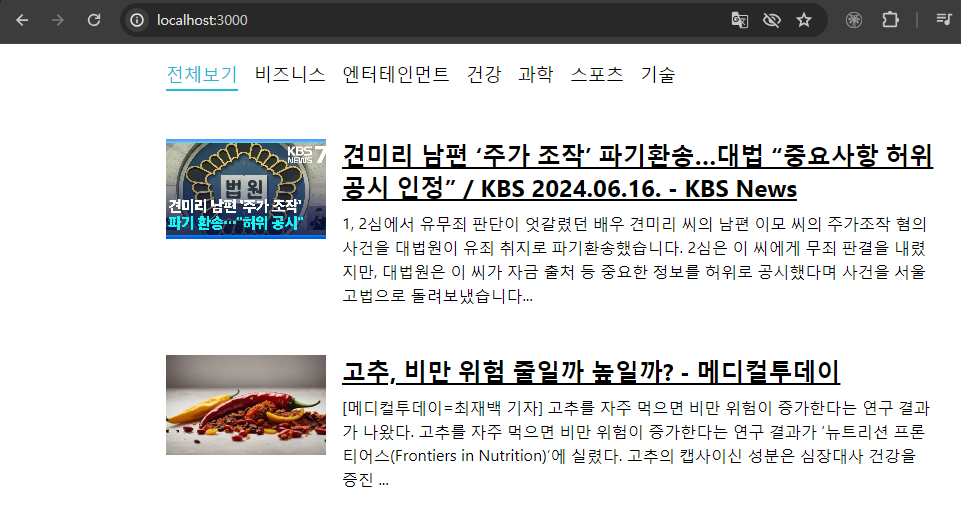

## 14.8 usePromise 커스터 Hook 만들기
- 컴포넌트에서 API 호출처럼 Promise를 사용해야 하는 경우 간결하게 코드를 작성 할 수 있도록 커스텀 Hook 제작
    ```js
    import { useState, useEffect } from 'react';

    export default function usePromise(promiseCreator, deps) {
        // 로딩중 / 완료 / 실패에 대한 상태 관리
        const [loading, setLoading] = useState(false);
        const [resolved, setResolved] = useState(null);
        const [error, setError] = useState(null);

        useEffect(() => {
            const process = async () => {
                setLoading(true);
                try {
                    const resolved = await promiseCreator();
                    setResolved(resolved);
                } catch (e) {
                    setError(e);
                }
                setLoading(false);
            };
            process();
            // eslint-disable-next-line react-hooks/exhaustive-deps
        }, deps);

        return [loading, resolved, error];
    }
    ```
- newslist 컴포넌트에 적용
    ```js
    import {useState, useEffect} from 'react';
    import styled from 'styled-components';
    import NewsItem from './NewsItem';
    import axios from 'axios'
    import usePromise from '../lib/usePromise';

    const NewsListBlock = styled.div`
        box-sizing: border-box;
        padding-bottom: 3rem;
        width: 768px;
        margin: 0 auto;
        margin-top: 2rem;
        @media screen and (max-width: 768px) {
            width: 100%;
            padding-left: 1rem;
            padding-right: 1rem;
        }
    `;

    const NewsList = ({category}) => {
        const [loading, response, error] = usePromise(() => {
            const query = category === 'all' ? '' : `&category=${category}`
            return axios.get(
                `https://newsapi.org/v2/top-headlines?country=kr${query}&apiKey=e48a2867c25d4a18860aaf6600b8079b`,
            )
        },[category])

        // 대기 중일 때
        if (loading) {
            return <NewsListBlock>대기 중...</NewsListBlock>
        }

        // 아직 response 값이 설정되지 않았을 때
        if (!response) {
            return null
        }

        // 에러 발생 시
        if (error) {
            return <NewsListBlock>에러 발생!</NewsListBlock>
        }

        // response 값이 유효
        const {articles} = response.data
        return(
            <NewsListBlock>
                {articles.map(article =>(
                    <NewsItem key={article.url} article={article} />
                ))}
            </NewsListBlock>
        )
    };

    export default NewsList;
    ```

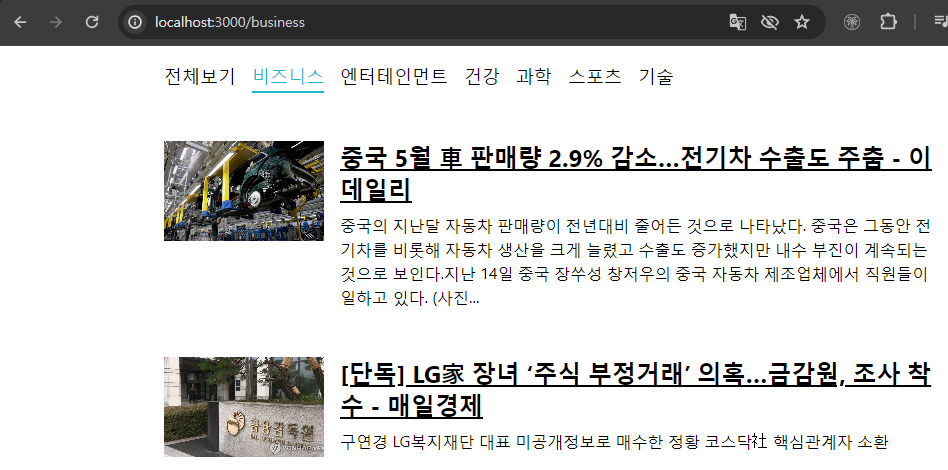

- 정상 작동 확인 가능

## 14.9 정리
- 외부 API 연동 사용법 학습
- 뉴스 뷰어 만들기
- useEffect에 등록하는 함수는 async로 작성하면 안된다
    - 대신 함수 내부에 async 함수를 따로 만들어 주어야 한다